Notebook to predict Salaries

# Step 1: Import Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge, Lasso




# Step 2: Load the Dataset

In [2]:

df = pd.read_csv('Salary Data.csv')  # Update this path to your dataset

# Step 3: Data Cleaning
# Check for missing values

In [3]:

print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


# Drop rows with any NaN values (you can also choose to fill them with a method like mean or median)


In [4]:
df = df.dropna()

# Step 4: Basic Data Exploration


In [5]:
print("Basic Statistics:\n", df.describe())
print("Data Types:\n", df.dtypes)

Basic Statistics:
               Age  Years of Experience         Salary
count  354.000000           354.000000     354.000000
mean    37.522599            10.125706  100919.067797
std      7.022489             6.570096   48519.325427
min     23.000000             0.000000     350.000000
25%     32.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.750000  140000.000000
max     53.000000            25.000000  250000.000000
Data Types:
 Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


# Check the distribution of the target variable


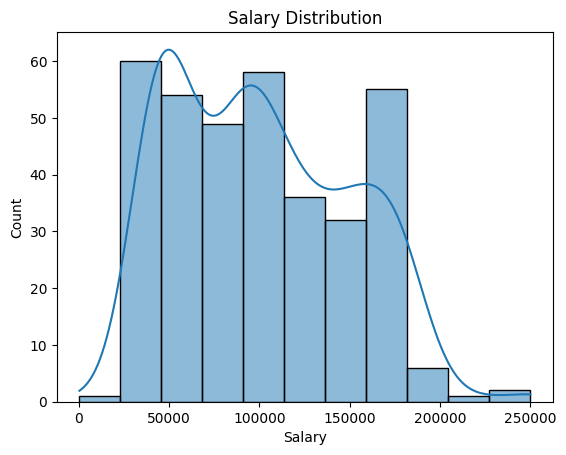

In [6]:
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.show()

# Check the correlation matrix

/tmp/ipykernel_426716/2293471857.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


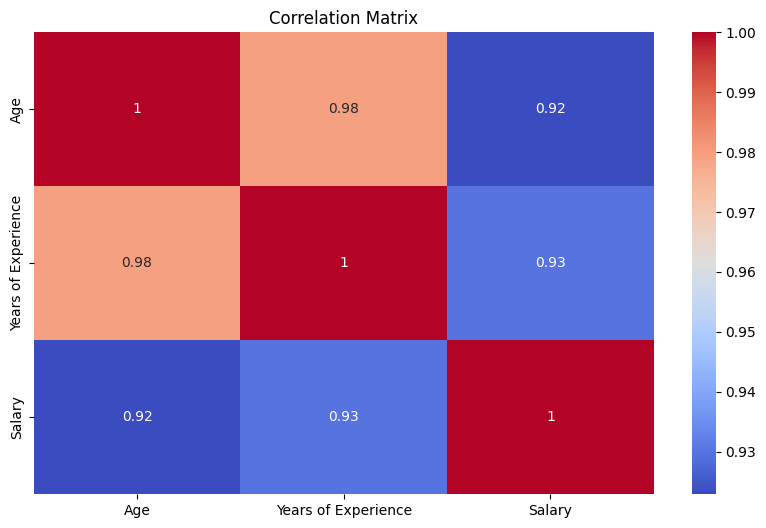

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 5: Data Preprocessing
# Convert categorical columns to numerical values

In [7]:
label_encoders = {}
for column in ['Gender', 'Education Level', 'Job Title']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Prepare the feature matrix and target vector

In [8]:

X = df.drop('Salary', axis=1)
y = df['Salary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Transform your data

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Define the Algorithms


In [10]:
algorithms = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(),
    "Stochastic Gradient Descent": SGDRegressor(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}



# Step 7: Train and Evaluate the Models


In [11]:
results = []
for name, algorithm in algorithms.items():
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Algorithm": name,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R2 Score": r2
    })

results_df = pd.DataFrame(results)

/home/ositolam/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Step 8: Display Results

In [12]:

print(results_df)

                     Algorithm  Mean Squared Error  Mean Absolute Error  \
0            Linear Regression        2.081711e+08         10131.232286   
1                Decision Tree        2.559635e+08          9539.788732   
2                Random Forest        1.981900e+08          8757.599564   
3            Gradient Boosting        1.679597e+08          8708.413075   
4       Support Vector Machine        2.518622e+09         42928.728400   
5          K-Nearest Neighbors        1.733619e+08          9602.676056   
6               Neural Network        1.271096e+10        101148.823789   
7  Stochastic Gradient Descent        2.074885e+08         10161.218592   
8             Ridge Regression        2.080202e+08         10140.654417   
9             Lasso Regression        2.081443e+08         10131.768070   

   R2 Score  
0  0.916176  
1  0.896931  
2  0.920195  
3  0.932368  
4 -0.014172  
5  0.930192  
6 -4.118315  
7  0.916451  
8  0.916237  
9  0.916187  


# Step 9: Save the Notebook


In [14]:
results_df.to_csv('results.csv', index=False)

# Save the best model

In [15]:
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']